**Importing The Libraries and Data Set**

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


**Installing Required Version of the Numpy**

In [52]:
 pip install -U numpy==1.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.11.0.zip (4.7 MB)
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
    Running setup.py install for numpy ... error
  Rolling back uninstall of numpy
  Moving to /usr/bin/f2py
   from /tmp/pip-uninstall-4_n_rl14/f2py
  Moving to /usr/local/bin/f2py
   from /tmp/pip-uninstall-qg5nhbfv/f2py
  Moving to /usr/local/bin/f2py3
   from /tmp/pip-uninstall-qg5nhbfv/f2py3
  Moving to /usr/local/bin/f2py3.7
   from /tmp/pip-uninstall-qg5nhbfv/f2py3.7
  Moving to /usr/local/lib/python3.7/dist-packages/numpy-1.21.6.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~umpy-1.21.6.dist-info
  Moving to /usr/local/lib/python3.7/dist-pa

In [53]:
data = pd.read_csv('/content/train.csv')

**Data Functions**

In [54]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

**Training Y Model**

In [55]:
Y_train

array([7, 8, 6, ..., 1, 0, 1])

**Neural Network**

In [56]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [57]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [58]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[5 5 5 ... 5 5 8] [7 8 6 ... 1 0 1]
0.10339024390243902
Iteration:  10
[6 2 6 ... 1 0 8] [7 8 6 ... 1 0 1]
0.24614634146341463
Iteration:  20
[6 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.32158536585365854
Iteration:  30
[6 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.37458536585365854
Iteration:  40
[6 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.4182682926829268
Iteration:  50
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.4608536585365854
Iteration:  60
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.5059268292682927
Iteration:  70
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.544219512195122
Iteration:  80
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.5780975609756097
Iteration:  90
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.6053658536585366
Iteration:  100
[7 3 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.6270487804878049
Iteration:  110
[7 8 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.6475609756097561
Iteration:  120
[7 8 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.6648780487804878
Iteration:  130
[7 8 4 ... 1 0 8] [7 8 6 ... 1 0 1]
0.6805609756097561
Iteration:  14

In [59]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


**Taking Examples**

Prediction:  [7]
Label:  7


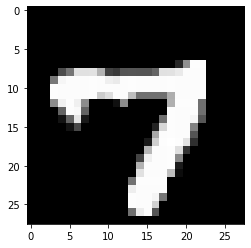

Prediction:  [8]
Label:  8


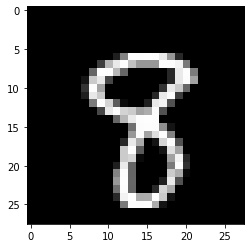

Prediction:  [6]
Label:  6


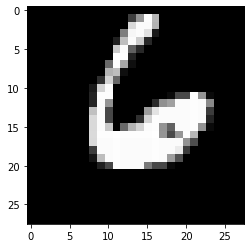

Prediction:  [9]
Label:  9


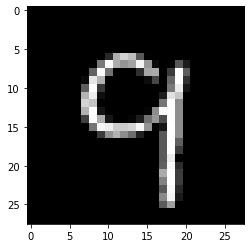

Prediction:  [4]
Label:  4


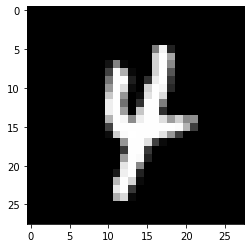

Prediction:  [5]
Label:  5


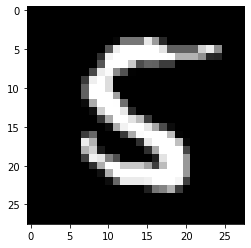

Prediction:  [8]
Label:  8


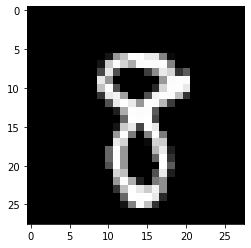

Prediction:  [5]
Label:  5


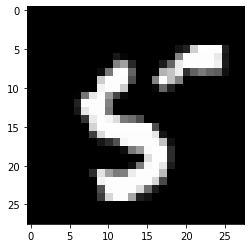

Prediction:  [5]
Label:  5


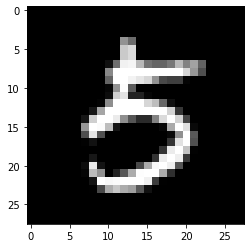

Prediction:  [0]
Label:  0


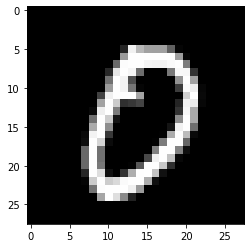

In [60]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

**Accuracy**

In [61]:
dev_predictions = (make_predictions(X_dev, W1, b1, W2, b2))
get_accuracy(dev_predictions, Y_dev)

[2 2 8 9 0 7 0 4 8 7 8 4 1 5 1 1 8 6 4 9 7 3 5 1 9 3 4 1 1 1 1 6 7 1 0 0 1
 7 7 6 6 6 7 0 0 1 9 7 9 8 1 9 6 7 4 2 2 2 7 2 8 7 0 3 1 4 2 9 5 5 5 1 4 0
 4 5 9 8 1 9 0 2 6 1 5 9 0 6 1 6 9 9 5 9 5 1 4 1 6 7 8 5 2 2 8 3 4 0 5 1 1
 7 9 1 8 5 0 1 1 3 5 6 6 8 3 0 0 0 1 9 0 4 3 7 3 1 1 4 1 3 6 8 2 0 3 6 7 7
 1 2 1 7 1 6 2 2 6 7 4 0 5 0 8 3 2 3 8 6 2 2 7 3 3 8 9 1 5 4 4 5 3 1 9 4 3
 6 8 7 0 2 3 7 6 0 7 4 4 5 1 2 6 5 0 0 6 2 1 7 1 5 5 9 4 4 6 1 7 7 4 4 6 9
 0 3 6 9 9 7 5 8 0 6 2 5 4 8 5 0 1 5 4 6 2 6 6 0 1 5 2 9 3 1 6 8 0 5 6 1 2
 9 1 3 0 4 1 8 4 5 9 5 9 1 8 8 2 4 2 1 7 1 6 5 6 2 7 1 9 5 1 8 8 2 2 1 6 0
 1 9 2 3 4 3 4 7 0 8 3 2 3 9 5 4 0 0 1 8 4 4 4 8 1 0 7 5 6 7 2 9 7 1 7 8 4
 6 1 9 8 5 6 3 2 5 6 8 2 3 8 4 4 5 1 6 7 6 7 4 5 1 6 6 5 4 1 6 3 1 2 6 5 7
 6 2 8 6 1 6 1 2 4 3 1 4 4 1 3 9 7 2 8 8 0 1 3 1 1 0 2 5 1 4 7 3 1 2 9 3 9
 1 8 3 8 7 8 6 1 3 3 4 0 6 3 8 1 1 0 6 8 9 6 6 4 9 0 1 0 9 3 6 9 8 8 4 4 4
 1 1 8 8 8 4 9 1 6 3 6 9 1 9 3 2 5 8 7 5 3 3 3 9 3 3 7 7 0 2 2 3 5 3 0 7 9
 4 5 9 6 3 8 3 5 9 4 2 2 

0.846